# Assignments for Week-02

## Re-code the house price machine learning

1.Re-code the house price machine learning

In [2]:
from sklearn.datasets import load_boston

In [3]:
data = load_boston()

In [4]:
x_list,y = data['data'],data['target']

In [5]:
x = x_list[:,5]

In [6]:
def x_y_func(x,k,b):
    return x*k+b

In [7]:
def loss(y,x_y):
    a = 0
    for i,j in list(zip(y,x_y)):
        a += (i-j)**2
    return a

In [8]:
import random

In [9]:
def generate_k_b(x,y):
    loss_0 = float('inf')
    k_0 = 0
    b_0 = 0
    for i in range(2000):
        k = random.random()*200 - 100
        b = random.random()*200 - 100
        y_hat = x_y_func(x,k,b)
        if loss(y,y_hat) < loss_0:
            k_0 = k
            b_0 = b
            loss_0 = loss(y,y_hat)
    return [k_0,b_0,loss_0]

In [10]:
generate_k_b(x,y)

[6.115972552064235, -15.809403145981491, 24289.43683855736]

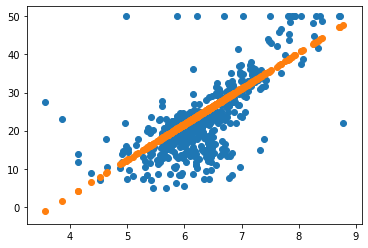

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
best_k_b = generate_k_b(x,y)
y_hat = x_y_func(x,best_k_b[0],best_k_b[1])
plt.scatter(x,y)
plt.scatter(x,y_hat)

In [12]:
  loss_0 = float('inf')
  k_0,b_0 = 0,0
  for i in range(5000):
     k = random.random()*100 - 50
     b = random.random()*100 - 50
     y_hat = x_y_func(x,k,b)
     if loss(y,y_hat) < loss_0:
        k_0,b_0,loss_0 = k,b,loss(y,y_hat)  
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, k_0, b_0, loss_0))

When time is : 0, get best_k: -5.747181789058111 best_b: 2.617547459630522, and the loss is: 1665788.2207785167
When time is : 1, get best_k: 14.737890948454975 best_b: -36.58112571068541, and the loss is: 598121.0180687864
When time is : 21, get best_k: 5.647596012322175 best_b: 6.782470544067209, and the loss is: 222263.53823971466
When time is : 25, get best_k: -2.4951958235880483 best_b: 32.84110702972903, and the loss is: 70200.892674999
When time is : 75, get best_k: 1.715108248877975 best_b: 5.627609239862629, and the loss is: 54657.2246742967
When time is : 105, get best_k: 9.806097971099845 best_b: -36.004281620505864, and the loss is: 27018.813728405505
When time is : 196, get best_k: 6.706915527874145 best_b: -17.719623887980262, and the loss is: 25315.096377664497
When time is : 241, get best_k: 8.72268404388511 best_b: -33.013804794849555, and the loss is: 22365.743565098237
When time is : 1779, get best_k: 8.549839199812212 best_b: -31.094170173775126, and the loss is: 22

 2.Supervised Direction to get optimal k and b

In [13]:
k_0 = random.random()*200-100
b_0 = random.random()*200-100
y_hat0 = x_y_func(x,k_0,b_0)
loss_0 = loss(y,y_hat0)
scalar = 0.1
direct = [(1,1),
         (-1,1),
         (-1,-1),
         (1,1)]
new_direct = random.choice(direct)
for i in range(2000):
    k_direct, b_direct=new_direct
    k_1,b_1 = k_0 + k_direct*scalar, b_0 + b_direct*scalar
    y_hat1 = x_y_func(x,k_1,b_1)
    if loss(y,y_hat1) < loss_0:
        k_0,b_0 = k_1, b_1
        loss_0 = loss(y,y_hat1)
        i += 1 
        if i % 10 == 0:print('the time is {},the best_k is {}, the best_b is {},the loss is {}'.format(i,k_0,b_0,loss_0))
    else:
        new_direct = random.choice(direct)

the time is 10,the best_k is -51.57817781596104, the best_b is 89.44946697406411,the loss is 34421529.391356036
the time is 20,the best_k is -50.57817781596103, the best_b is 90.44946697406405,the loss is 32522037.424754154
the time is 30,the best_k is -49.57817781596101, the best_b is 91.449466974064,the loss is 30676746.754646298
the time is 40,the best_k is -48.578177815961, the best_b is 92.44946697406394,the loss is 28885657.381032445
the time is 50,the best_k is -47.578177815960984, the best_b is 93.44946697406388,the loss is 27148769.30391258
the time is 60,the best_k is -46.57817781596097, the best_b is 94.44946697406382,the loss is 25466082.52328672
the time is 70,the best_k is -45.578177815960956, the best_b is 95.44946697406377,the loss is 23837597.03915486
the time is 80,the best_k is -44.57817781596094, the best_b is 96.44946697406371,the loss is 22263312.851517025
the time is 90,the best_k is -43.57817781596093, the best_b is 97.44946697406365,the loss is 20743229.9603731

3.Gradient Descent to get optimal k and b

In [14]:
def partial_k(x, y, y_hat):#求K的偏导数
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    
    return -2 / n * gradient


def partial_b(x, y, y_hat): #求b的偏导数
    n = len(y)

    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    
    return -2 / n * gradient

In [15]:
k_0 = random.random()*200 - 100
b_0 = random.random()*200 - 100
scalar = 1e-04
loss_ini = float('inf') 
y_hat0 = x_y_func(x,k_0,b_0)
loss_0 = loss(y,y_hat0)
for i in range(2000):
    if loss_0 < loss_ini:
        partial_k0 = partial_k(x, y, y_hat0)
        partial_b0 = partial_b(x, y, y_hat0)
        best_k,best_b = k_0,b_0
        k_0, b_0 = k_0 - partial_k0 * scalar, b_0 - partial_b0 * scalar
        loss_ini = loss_0
        y_hat0 = x_y_func(x,k_0,b_0)
        loss_0 = loss(y,y_hat0)
        if i % 10 == 0:print('the time is {},the best_k is {}, the best_b is {},the loss is {}'.format(i,best_k,best_b,loss_ini))


the time is 0,the best_k is 33.07483414078217, the best_b is -16.801299679397275,the loss is 14536781.571317377
the time is 10,the best_k is 31.01021644702094, the best_b is -17.126207126569195,the loss is 12334294.366021976
the time is 20,the best_k is 29.10870201793286, the best_b is -17.425473905498148,the loss is 10466043.322774317
the time is 30,the best_k is 27.357406141165914, the best_b is -17.701125558287536,the loss is 8881306.778070638
the time is 40,the best_k is 25.744461961438272, the best_b is -17.955027614749103,the loss is 7537060.282056573
the time is 50,the best_k is 24.25894007261092, the best_b is -18.188898232936754,the loss is 6396808.515820907
the time is 60,the best_k is 22.890774461766817, the best_b is -18.40431984111279,the loss is 5429594.469873984
the time is 70,the best_k is 21.63069430350546, the best_b is -18.60274986003056,the loss is 4609158.983722528
the time is 80,the best_k is 20.470161142301812, the best_b is -18.785530578186084,the loss is 391322

the time is 800,the best_k is 6.979178426861615, the best_b is -20.93076960422863,the loss is 23265.605951809415
the time is 810,the best_k is 6.976374570614666, the best_b is -20.931548811706143,the loss is 23261.335727454996
the time is 820,the best_k is 6.973796311587939, the best_b is -20.93229254601879,the loss is 23257.704946727816
the time is 830,the best_k is 6.971425828118851, the best_b is -20.93300360882247,the loss is 23254.61657193339
the time is 840,the best_k is 6.969246706407468, the best_b is -20.933684580449945,the loss is 23251.988291232396
the time is 850,the best_k is 6.967243829299206, the best_b is -20.934337837394743,the loss is 23249.750283933474
the time is 860,the best_k is 6.965403273853389, the best_b is -20.93496556841393,the loss is 23247.843324912243
the time is 870,the best_k is 6.963712217003614, the best_b is -20.935569789358738,the loss is 23246.217176691862
the time is 880,the best_k is 6.962158848670695, the best_b is -20.93615235683369,the loss is

the time is 1620,the best_k is 6.947323774856076, the best_b is -20.963501326550738,the loss is 23233.210982682278
the time is 1630,the best_k is 6.947372241347416, the best_b is -20.963831467755092,the loss is 23233.1546436095
the time is 1640,the best_k is 6.947420971279021, the best_b is -20.964161559423196,the loss is 23233.098308126235
the time is 1650,the best_k is 6.947469943741425, the best_b is -20.964491604842305,the loss is 23233.041976098717
the time is 1660,the best_k is 6.947519139476956, the best_b is -20.964821607040022,the loss is 23232.985647413538
the time is 1670,the best_k is 6.947568540749247, the best_b is -20.9651515688048,the loss is 23232.92932197448
the time is 1680,the best_k is 6.947618131223058, the best_b is -20.965481492704804,the loss is 23232.87299969982
the time is 1690,the best_k is 6.947667895853593, the best_b is -20.96581138110535,the loss is 23232.816680520333
the time is 1700,the best_k is 6.947717820784555, the best_b is -20.966141236184917,the

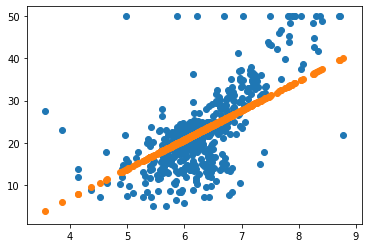

In [16]:
plt.scatter(x,y) 
plt.scatter(x,x_y_func(x,best_k,best_b))         

4. Try different Loss function and learning rate.

In [17]:
def loss_abs(y,x_y):
    a = 0
    for i,j in list(zip(y,x_y)):
        a += abs(i-j)
    return a

In [18]:
k_0 = random.random()*200-100
b_0 = random.random()*200-100
y_hat0 = x_y_func(x,k_0,b_0)
loss_0 = loss_abs(y,y_hat0)
scalar = 0.1
direct = [(1,1),
         (-1,1),
         (-1,-1),
         (1,1)]
new_direct = random.choice(direct)
for i in range(2000):
    k_direct, b_direct=new_direct
    k_1,b_1 = k_0 + k_direct*scalar, b_0 + b_direct*scalar
    y_hat1 = x_y_func(x,k_1,b_1)
    if loss_abs(y,y_hat1) < loss_0:
        k_0,b_0 = k_1, b_1
        loss_0 = loss_abs(y,y_hat1)
        i += 1 
        if i % 10 == 0:print('the time is {},the best_k is {}, the best_b is {},the loss is {}'.format(i,k_0,b_0,loss_0))
    else:
        new_direct = random.choice(direct)

the time is 10,the best_k is 20.928148983781938, the best_b is -47.06206548356923,the loss is 31337.1056913698
the time is 20,the best_k is 19.928148983781924, the best_b is -48.06206548356924,the loss is 27660.202691369694
the time is 30,the best_k is 18.92814898378191, the best_b is -49.062065483569256,the loss is 23993.278021438025
the time is 40,the best_k is 17.928148983781895, the best_b is -50.06206548356927,the loss is 20336.126273356407
the time is 50,the best_k is 16.92814898378188, the best_b is -51.062065483569285,the loss is 16684.107653764037
the time is 60,the best_k is 15.928148983781869, the best_b is -52.0620654835693,the loss is 13048.726036564756
the time is 70,the best_k is 14.928148983781872, the best_b is -53.06206548356931,the loss is 9450.319576296773
the time is 80,the best_k is 13.928148983781876, the best_b is -54.06206548356933,the loss is 5928.018503529794
the time is 90,the best_k is 12.92814898378188, the best_b is -55.06206548356934,the loss is 2882.310

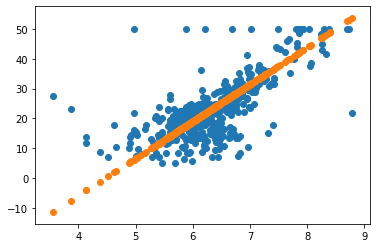

In [19]:
plt.scatter(x,y) 
plt.scatter(x,x_y_func(x,k_0,b_0))   

## 2. Answer following questions:

1. Why do we need machine learning methods instead of creating a complicated formula?

Ans:一个复杂的方程只能对现有的样本点做一个拟合，但对新的样本点，之前的复杂函数就不适用了。机器学习是要通过对已知的样本点研究，按照一定的规则，寻找一个最优的模型对样本进行解释。这种模型对于新的样本点一样有解释性。

2. Wha't's the disadvantages of the 1st Random Choosen methods in our course?

Ans:第一种随机选择方法的缺点是偶然性比较大，我们需要花费大量的随机模拟才能找到一个相对较优的目标参数值，这种方法找出来的值是低效率的，高偏差，高方差的

3. Is the 2nd method supervised direction better than 1st one? What's the disadvantages of the 2nd supversied directin method?

Ans:第2中方法相对第一种方法来说，有了很大改进，主要在于它寻找目标值有了一定的方向性，不再是无头苍蝇。其缺点是其让损失函数变小的方向不是最快方向，导致目标值收敛速度较慢。此外，改方法达到的最优值是局部最优而不是全局最优。

4. Why do we use Derivative / Gredient to fit a target function?

Ans:利用导数/梯度的方法能够找到使损失函数下降的最快方向，是要寻找的目标值能够快速收敛。

5. In the words 'Gredient Descent', what's the Gredient and what's the Descent?

Ans:梯度指的是损失函数上升/下降最快的方向，下降是选择梯度下降的那一个方向

6. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:收敛速度快，节省计算机算力

7. Using the simple words to describe: What's the machine leanring.

Ans:通过计算样本，得到该类总体的一种模式，把得到的该类模式用于预测，解释总体等等。


## 3. Finish the search problem

1. Get data from web page.

In [32]:
import requests
import re
url = "http://sh.bendibao.com/ditie/"
response = requests.get(url+"linemap.shtml")
pattern = '<a style="color:#.+?;" href="/ditie/(.+?)" target="_blank">'
lines = re.findall(pattern,response.text)
pattern1 = '<strong><a href="/ditie/map.+?shtml" target="_blank">上海(.+?)线路图</a></strong>'
lines_name = re.findall(pattern1,response.text)

station_per_line = dict() # list of stations per line w/o coordinate
stations = set() # list of stations

station_with_change = r'<a class="link" href="/ditie/zd_.+?\.shtml">(.+?)$'
station_without_change = '<a href="/ditie/zd_.+?\.shtml" class="link" target="_blank">(.+?)$'
for line, line_name in zip(lines,lines_name):
    station_in_order = []
    # the order of station on each line does matter
    order = []
    for text in requests.get(url+line).text.split("</a>"):
        if re.search(station_with_change, text):
            stations.update(re.findall(station_with_change, text))# order doesn't matter
            order.append(re.findall(station_with_change, text)[0])
        elif re.search(station_without_change, text):
            stations.update(re.findall(station_without_change, text))# order doesn't matter
            order.append(re.findall(station_without_change, text)[0])
        else: continue
    # I have to write a loop becuase stations with change lanes have different patterns
    station_per_line[line_name] = order
station_per_line

{'地铁1号线': ['富锦路',
  '友谊西路',
  '宝安公路',
  '共富新村',
  '呼兰路',
  '通河新村',
  '共康路',
  '彭浦新村',
  '汶水路',
  '上海马戏城',
  '延长路',
  '中山北路',
  '上海火车站',
  '汉中路',
  '新闸路',
  '人民广场',
  '黄陂南路',
  '陕西南路',
  '常熟路',
  '衡山路',
  '徐家汇',
  '上海体育馆',
  '漕宝路',
  '上海南站',
  '锦江乐园',
  '莲花路',
  '外环路',
  '莘庄'],
 '地铁2号线': ['徐泾东',
  '虹桥火车站',
  '虹桥2号航站楼',
  '淞虹路',
  '北新泾',
  '威宁路',
  '娄山关路',
  '中山公园',
  '江苏路',
  '静安寺',
  '南京西路',
  '人民广场',
  '南京东路',
  '陆家嘴',
  '东昌路',
  '世纪大道',
  '上海科技馆',
  '世纪公园',
  '龙阳路',
  '张江高科',
  '金科路',
  '广兰路',
  '唐镇',
  '创新中路',
  '华夏东路',
  '川沙',
  '凌空路',
  '远东大道',
  '海天三路',
  '浦东国际机场'],
 '地铁3号线': ['上海南站',
  '石龙路',
  '龙漕路',
  '漕溪路',
  '宜山路',
  '虹桥路',
  '延安西路',
  '中山公园',
  '金沙江路',
  '曹杨路',
  '镇坪路',
  '中潭路',
  '上海火车站',
  '宝山路',
  '东宝兴路',
  '虹口足球场',
  '赤峰路',
  '大柏树',
  '江湾镇',
  '殷高西路',
  '长江南路',
  '淞发路',
  '张华浜',
  '淞滨路',
  '水产路',
  '宝杨路',
  '友谊路',
  '铁力路',
  '江杨北路'],
 '地铁4号线': ['宜山路',
  '虹桥路',
  '延安西路',
  '中山公园',
  '金沙江路',
  '曹杨路',
  '镇坪路',
  '中潭路',
  '上海火车站',
  '宝山路',
  '海伦路',
  '临平路',
  '大连路',
  '杨树浦路

In [33]:
def getcode(site):
    
    parameters = { 'address' : site, 'key': '6a3cedb987fc738482aa6a7b1b54e609'}
    
    base = 'http://restapi.amap.com/v3/geocode/geo'
    
    response = requests.get(base, parameters)
    
    info_site = response.json()
    return info_site
    #print(info_site)
    
#if __name__ == '__main__':
#    address = '广州天河区'
#    getcode(address)
 
def get_site(info):
    lat = info['geocodes'][0]['location'].split(',')[0]
    lng = info['geocodes'][0]['location'].split(',')[1]
    
    return lat, lng

In [72]:
station_location = {}
for line in station_per_line.values():
    for station in line:
        address = getcode('上海市'+station+'地铁站')
        coord = get_site(address)
        station_location[station] = (float(coord[0]),float(coord[1]))

In [ ]:
station_location['东方绿舟'] = [121.019538,31.098511]#update some station location
station_location['东城一路'] = [121.532152,31.031338]
station_location['肖塘'] = [121.442730,30.966229]
station_location['奉浦大道'] = [121.449294,30.942624]
station_location['环城东路'] = [121.463359,30.931693]
station_location['望园路'] = [121.484236,30.932534]
station_location['金海湖'] = [121.493398,30.929396]
station_location['奉贤新城'] = [121.496193,30.913989]
station_location['淀山湖大道'] = [121.082124,31.134242]
station_location['漕盈路'] = [121.096823,31.160393]
station_location['青浦新城'] = [121.125737,31.158813]
station_location['汇金路'] = [121.151862,31.161191]
station_location['赵巷'] = [121.1922776,31.161109]
station_location['安亭'] = [121.162129,31.288444]
station_location['兆丰路'] = [121.150242,31.289067]
station_location['光明路'] = [121.117261,31.296200]
station_location['花桥'] = [121.104279,31.298721]
station_location['秀沿路'] = [121.598213,31.138002]

In [93]:
import networkx as nx
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['FangSong']

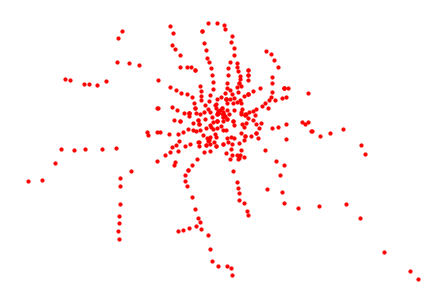

In [116]:
%matplotlib inline #draw scatter plot
station_graph = nx.Graph()
station_graph.add_nodes_from(list(station_location.keys()))
#nx.draw(station_graph, with_labels=False, node_size=5)
nx.draw(station_graph, station_location, with_labels=False, node_size=10)

In [77]:
from collections import defaultdict   #generate dict of station connection
connection_station = defaultdict(list)
for line in station_per_line.values():
    for i,station in enumerate(line):
        if i == 0:
            connection_station[station].append(line[i+1])
        elif i == (len(line) - 1):
            connection_station[station].append(line[i-1])
        else:
            connection_station[station].append(line[i-1])
            connection_station[station].append(line[i+1])

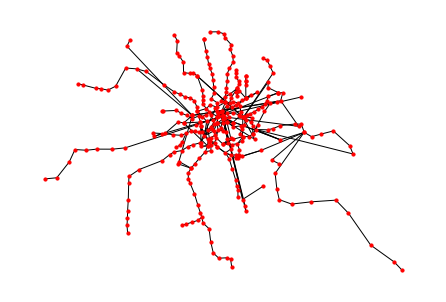

In [117]:
station_graph = nx.Graph(connection_station) #draw edge plot
#station_graph.add_nodes_from(list(station_location.keys()))
#nx.draw(station_graph, with_labels=False, node_size=5)
nx.draw(station_graph, station_location, with_labels=False, node_size=10)

In [118]:
def search(start,destination,connection_graph):#广度优先
    pathes = [[start]]
    visited = set()
    while pathes:
        path = pathes.pop(0)
        froninter = path[-1]
        if froninter in visited:continue
        successor = connection_graph[froninter]
        for city in successor:
            if city in path: continue
            new_path = path + [city]
            pathes.append(new_path)
            if city == destination: return new_path
        visited.add(froninter)

In [162]:
line_best = search('浦东国际机场','松江大学城',connection_station)#to find the line of start place to destination
line_best

['浦东国际机场',
 '龙阳路',
 '华夏中路',
 '罗山路',
 '御桥',
 '三林东',
 '三林',
 '东方体育中心',
 '龙耀路',
 '上海游泳馆',
 '徐家汇',
 '宜山路',
 '桂林路',
 '漕河泾开发区',
 '合川路',
 '星中路',
 '七宝',
 '中春路',
 '九亭',
 '泗泾',
 '佘山',
 '洞泾',
 '松江大学城']